#🎯 Objetivos da Aula


* Compreender o que é regressão e para que serve
* Distinguir entre variável dependente e independente
* Entender a equação da regressão
* Ver a diferença entre regressão simples e múltipla
* Interpretar coeficientes e erro
* Aplicações práticas

#📊 O que é Regressão?

Regressão é uma técnica estatística usada para entender e quantificar a relação entre uma variável dependente (Y) e uma ou mais variáveis independentes (X). É como montar uma equação que tenta prever ou explicar algo com base em outros fatores.

🧠 Exemplo do dia a dia: Imagine que você é um gestor de uma clínica e quer entender o que influencia o tempo de espera médio dos pacientes.

* Y (variável dependente): tempo de espera
* X1: número de profissionais de plantão
* X2: número de pacientes agendados
* X3: presença ou não de encaixes


Com uma análise de regressão, você pode:
* Prever o tempo de espera esperado com base nesses fatores.
* Entender quais fatores influenciam mais o tempo de espera.

# 🔁 Variável dependente vs. independentes

* **Variável dependente (Y):**
É o que você quer explicar ou prever. Ex: tempo de espera, glicemia, custo, pressão arterial.



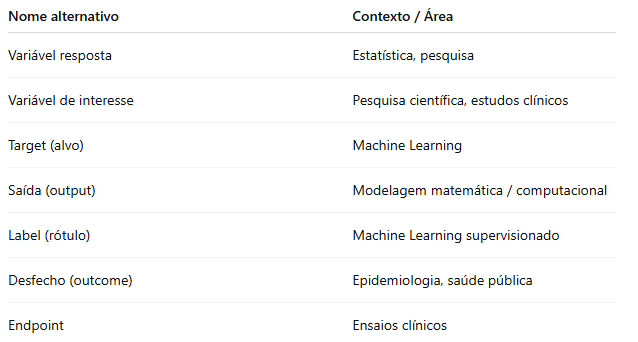

* **Variáveis independentes (X):** São os fatores que você acredita influenciar o Y. Ex: idade, número de consultas anteriores, dias desde última medicação.

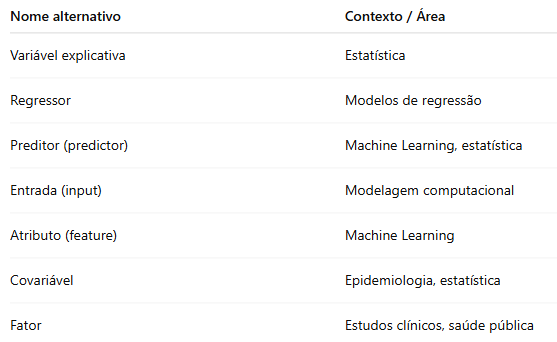

#📏 Regressão simples vs. múltipla

**Regressão simples**: Usa uma variável X para prever Y.

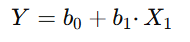

**Regressão múltipla:** Usa várias variáveis X.

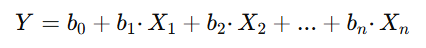

#👉 Representação de uma Regressão

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.DataFrame(
    [
        [1,	1],
        [2,	2],
        [3,	1.3],
        [4,	3.75],
        [5,	2.25]
    ],
    columns=list('XY')
)
df

,X,Y
0,1,1.00
1,2,2.00
2,3,1.30
3,4,3.75
4,5,2.25


In [ ]:
colors = ['red', 'blue', 'green', 'brown', 'purple']
go.Figure({
    'data': [
        {'x': df['X'], 'y': df['Y'], 'type': 'scatter', 'mode': 'markers',
         'marker': {'size': 20, 'color': colors}}
    ],
    'layout': {
        'height': 600,
        'width': 900,
        'title': {'text': 'Scatter plot dos dados de exemplo'}
    }
})

Na prática, a regressão linear consiste em encontrar a reta mais adequada que passa pelos pontos. A reta mais adequada é chamada de reta de regressão.

In [ ]:
fit = np.polyfit(df.X, df.Y, deg=1)
df['Y_hat'] = fit[0] * df.X + fit[1]
df

,X,Y,Y_hat,error
0,1,1.00,1.210,-0.210
1,2,2.00,1.635,0.365
2,3,1.30,2.060,-0.760
3,4,3.75,2.485,1.265
4,5,2.25,2.910,-0.660


In [ ]:
title = ('Um gráfico de dispersão dos dados de exemplo. A linha preta\n'
'consiste nas previsões')
print(title)
go.Figure({
    'data': [
        {'x': df['X'], 'y': df['Y'], 'type': 'scatter', 'mode': 'markers', 'name': 'example data',
         'marker': {'size': 20, 'color': ['red', 'blue', 'green', 'brown', 'purple']}},
        {'x': df['X'], 'y': df['Y_hat'], 'marker': {'color': 'black'}, 'mode': 'lines', 'name': 'predictions'}
    ],
    'layout': {
        'height': 600,
        'width': 900
    }
})

Um gráfico de dispersão dos dados de exemplo. A linha preta
consiste nas previsões


A linha diagonal preta na Figura é a reta de regressão e consiste na pontuação prevista em Y para cada valor possível de X.

Como você pode ver, o ponto vermelho está muito próximo da reta de regressão; seu erro de previsão é pequeno. Em contraste, o ponto amarelo é muito mais alto que a reta de regressão e, portanto, seu erro de previsão é grande.

#🧮 Coeficientes e interpretação

* b₀ (intercepto): valor base de Y quando todos os Xs forem zero.
* b₁, b₂, ...: representam o quanto Y muda quando aquela variável X aumenta 1 unidade.

📌 Exemplo prático:

Suponha que seu modelo é:

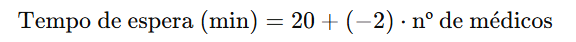

→ Cada médico extra reduz o tempo médio de espera em 2 minutos.

→ Se quisermos prever o valor do tempo de espera, basta substituir esses valores na equação.

#📘 O termo de Erro de previsão

É importante ressaltar que em muitas literaturas, você verá a equação com "e" no final da equação

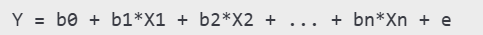

Onde:
* b0 é o intercepto (valor base de Y quando todos os X valem zero)
* b1, b2, ..., bn são os coeficientes das variáveis independentes
* e é o erro aleatório (diferença entre o valor observado e o previsto

Nenhum modelo é perfeito. Por isso existe o erro (e) ou resíduo, que representa a diferença entre o valor observado e o valor previsto:

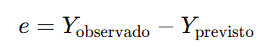

Exemplo com preço de uma casa: Se tivermos:
* b0 = 50000  (preço base)
* b1 = -500  (idade da casa)
* b2 = 20000 (quantidade de quartos)

E queremos prever o preço de uma casa com 30 anos e 3 quartos:

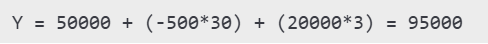

Se o valor real for 100.000 e o modelo previu 95.000:

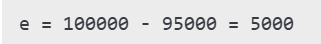

**Esse erro reflete ruído, variáveis não incluídas, ou relações não lineares.**

In [ ]:
df['error'] = df.Y - df.Y_hat

In [ ]:
df

,X,Y,Y_hat,error
0,1,1.00,1.210,-0.210
1,2,2.00,1.635,0.365
2,3,1.30,2.060,-0.760
3,4,3.75,2.485,1.265
4,5,2.25,2.910,-0.660


In [ ]:
title = ('Um gráfico de dispersão dos dados de exemplo. A linha preta\n'
'consiste nas previsões, os pontos são os dados reais,\n'
'e as linhas verticais entre os pontos e a linha preta\n'
'representam erros de previsão.')
print(title)
go.Figure({
    'data': [
        {'x': df['X'], 'y': df['Y'], 'type': 'scatter', 'mode': 'markers', 'name': 'example data',
         'marker': {'size': 20, 'color': ['red', 'blue', 'green', 'brown', 'purple']}},
        {'x': df['X'], 'y': df['Y_hat'], 'marker': {'color': 'black'}, 'mode': 'lines', 'name': 'predictions'}
    ],
    'layout': {
        'height': 600,
        'width': 900,
        'shapes': [
            {'type': 'line', 'xref': 'x', 'yref': 'y', 'x0': X, 'y0': min(Y, Y_hat),
             'x1': X, 'y1': max(Y, Y_hat), 'line': {'dash': 'dash', 'color': colors[i]}}
            for i, (X, Y, Y_hat, error) in df.iterrows()
        ],
        'annotations': [
            {'xref': 'x', 'yref': 'y', 'x': X - 0.25, 'y': min(Y, Y_hat)+abs(error)/2, 'text': f'{error:.2f}',
             'font': {'size': 20, 'color': colors[i]}, 'showarrow': False}
            for i, (X, Y, Y_hat, error) in df.iterrows()
        ]
    }
})

Um gráfico de dispersão dos dados de exemplo. A linha preta
consiste nas previsões, os pontos são os dados reais,
e as linhas verticais entre os pontos e a linha preta
representam erros de previsão.


Graficamente, os resíduos são as distâncias vertificais entre os valores observados (valores registrados) e os valores ajustados (valores que o modelo prevê)

#✔️ Ajuste do modelo (OLS)

Como veremos, usamos o método dos Mínimos Quadrados Ordinários (OLS) para encontrar os coeficientes que minimizam a soma dos quadrados dos erros. Quando usamos o método OLS, o termo "e" não aparece explicitamente na equação. Embora não presente, o termo de erro continua sendo importante para:

* Diagnóstico dos resíduos (e): Após ajustar o modelo, calculamos os resíduos (os valoroes de e) para avaliar a qualidade do ajuste. Isso nos ajuda a identificar padrões ou problemas como a ausência de variáveis importantes ou relações nã lineares.
* Suposições do modelo: O modelo de regressão assume que os erros são independentes, distribuídos normalmente com média zero e possuem variância constante (homocedasticidade). Analisar resíduos é importante para verificar se essas suposições são atendidas.
* Métricas de qualidade: Medidas como R² (coeficiente de determinação), que é a proporção da variabilidade explicada pelo modelo, assim como MAE (Erro médio absoluto) e MSE (Erro quadrático medio) derivam dos erros. Eles ajudam a entender o quão bem o modelo ajusta os dados e qual a magnitude média das diferenças entre valores observados e preditos.

# 🧪 Referências Interessantes para melhor compreender

https://istats.shinyapps.io/LinearRegression/